In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("breast-cancer.csv") 

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]

In [7]:
y = data.diagnosis.values 
x_data = data.drop(["diagnosis"],axis=1)

In [8]:
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

C:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [9]:
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.001007,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.001008,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.001008,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.20,random_state=42)

In [11]:
x_train = x_train.T
x_train.shape

(31, 455)

In [12]:
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [13]:
print(x_test.shape)

(31, 114)


In [14]:
y_train.shape

(455,)

In [15]:
y_test.shape

(114,)

In [16]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [17]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [18]:
sigmoid(0)

0.5

In [19]:
def forward_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b 
    y_head = sigmoid(z) 
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) 
    cost = (np.sum(loss))/x_train.shape[1]   

    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]  
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]              
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}

    return cost,gradients

In [20]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []    
    for i in range(number_of_iterarion): 
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train) 
        cost_list.append(cost) 
        w = w - learning_rate * gradients["derivative_weight"]  
        b = b - learning_rate * gradients["derivative_bias"]   
        if i % 10 == 0:
            cost_list2.append(cost) 
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": w,"bias": b} 
    plt.plot(index,cost_list2) 
    plt.xticks(index,rotation='vertical') 
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list 

In [21]:
def predict(w,b,x_test):    
    z = sigmoid(np.dot(w.T,x_test)+b) 
    Y_prediction = np.zeros((1,x_test.shape[1]))    
    for i in range(z.shape[1]): 
        if z[0,i]<= 0.5: 
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1                        
    return Y_prediction

Cost after iteration 0: 0.692993
Cost after iteration 10: 0.350569
Cost after iteration 20: 0.266614
Cost after iteration 30: 0.229533
Cost after iteration 40: 0.206808
Cost after iteration 50: 0.190983
Cost after iteration 60: 0.179083
Cost after iteration 70: 0.169672
Cost after iteration 80: 0.161963
Cost after iteration 90: 0.155483
Cost after iteration 100: 0.149928
Cost after iteration 110: 0.145092
Cost after iteration 120: 0.140830
Cost after iteration 130: 0.137036
Cost after iteration 140: 0.133629
Cost after iteration 150: 0.130548
Cost after iteration 160: 0.127743
Cost after iteration 170: 0.125177
Cost after iteration 180: 0.122818
Cost after iteration 190: 0.120639
Cost after iteration 200: 0.118620
Cost after iteration 210: 0.116741
Cost after iteration 220: 0.114988
Cost after iteration 230: 0.113347
Cost after iteration 240: 0.111807
Cost after iteration 250: 0.110359
Cost after iteration 260: 0.108993
Cost after iteration 270: 0.107703
Cost after iteration 280: 0.106

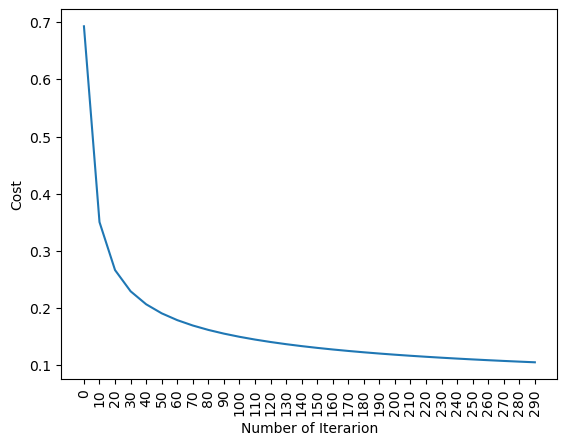

test accuracy: 97.36842105263158 %


In [22]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]  
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
   
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 3, num_iterations = 300)

In [23]:
from sklearn import linear_model
lr=linear_model.LogisticRegression(random_state=42,max_iter=40)
lr.fit(x_train.T,y_train.T)

LogisticRegression(max_iter=40, random_state=42)

In [24]:
y_pred=lr.predict(x_test.T)

In [25]:
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.9824561403508771
